In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [24]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
# Hyperparameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [27]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [29]:
def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg =img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


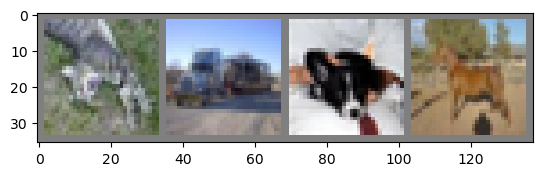

In [30]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1= nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


In [32]:
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [35]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [2000/12500], Loss: 2.3219
Epoch [1/5], Step [4000/12500], Loss: 2.2706
Epoch [1/5], Step [6000/12500], Loss: 2.2900
Epoch [1/5], Step [8000/12500], Loss: 2.2720
Epoch [1/5], Step [10000/12500], Loss: 2.3060
Epoch [1/5], Step [12000/12500], Loss: 2.0159
Epoch [2/5], Step [2000/12500], Loss: 1.9741
Epoch [2/5], Step [4000/12500], Loss: 2.3412
Epoch [2/5], Step [6000/12500], Loss: 2.7555
Epoch [2/5], Step [8000/12500], Loss: 1.7314
Epoch [2/5], Step [10000/12500], Loss: 1.6342
Epoch [2/5], Step [12000/12500], Loss: 1.6993
Epoch [3/5], Step [2000/12500], Loss: 2.0827
Epoch [3/5], Step [4000/12500], Loss: 2.1328
Epoch [3/5], Step [6000/12500], Loss: 1.7993
Epoch [3/5], Step [8000/12500], Loss: 1.5560
Epoch [3/5], Step [10000/12500], Loss: 1.8191
Epoch [3/5], Step [12000/12500], Loss: 1.6418
Epoch [4/5], Step [2000/12500], Loss: 2.3116
Epoch [4/5], Step [4000/12500], Loss: 1.7753
Epoch [4/5], Step [6000/12500], Loss: 1.3485
Epoch [4/5], Step [8000/12500], Loss: 1.8363
Epoc

In [36]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


In [37]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels= labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 48.33 %
Accuracy of plane: 46.4 %
Accuracy of car: 75.3 %
Accuracy of bird: 31.2 %
Accuracy of cat: 23.4 %
Accuracy of deer: 28.5 %
Accuracy of dog: 39.2 %
Accuracy of frog: 68.2 %
Accuracy of horse: 56.7 %
Accuracy of ship: 55.4 %
Accuracy of truck: 59.0 %
